In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acovf, acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np

# Zadanie 1


In [76]:
df1 = pd.read_csv("archiwum_tab_a_2025.csv", encoding='Latin2', sep=';')
df2 = pd.read_csv("archiwum_tab_a_2024.csv", encoding='Latin2', sep=';')
df3 = pd.read_csv("archiwum_tab_a_2023.csv", encoding='Latin2', sep=';')
df4 = pd.read_csv("archiwum_tab_a_2022.csv", encoding='Latin2', sep=';')
df5 = pd.read_csv("archiwum_tab_a_2021.csv", encoding='Latin2', sep=';')
df6 = pd.read_csv("archiwum_tab_a_2020.csv", encoding='Latin2', sep=';')
df7 = pd.read_csv("archiwum_tab_a_2019.csv", encoding='Latin2', sep=';')
df8 = pd.read_csv("archiwum_tab_a_2018.csv", encoding='Latin2', sep=';')
df9 = pd.read_csv("archiwum_tab_a_2017.csv", encoding='Latin2', sep=';')
df10 = pd.read_csv("archiwum_tab_a_2016.csv", encoding='Latin2', sep=';')

df1 = df1.iloc[1:-3]
df2 = df2.iloc[1:-3]
df3 = df3.iloc[1:-3]
df4 = df4.iloc[1:-3]
df5 = df5.iloc[1:-3]
df6 = df6.iloc[1:-3]
df7 = df7.iloc[1:-3]
df8 = df8.iloc[1:-3]
df9 = df9.iloc[1:-3]
df10 = df10.iloc[1:-3]

df = pd.concat([df10, df9, df8, df7, df6, df5, df4, df3, df2, df1])

In [57]:
#df1 = pd.read_csv("archiwum_tab_a_2025.csv", encoding='Latin2', sep=';')

In [58]:
#df2 = pd.read_csv("archiwum_tab_a_2024.csv", encoding='Latin2', sep=';')

In [ ]:
#df = pd.read_csv("archiwum_tab_a_2024.csv", encoding='Latin2', sep=';')

In [77]:
df = df.iloc[1:-3]

In [61]:
#df2 = df2.iloc[1:-3]
#df1 = df1.iloc[1:-3]

In [62]:
#df = pd.concat([df2, df1])

In [78]:
df

,data,1THB,1USD,1AUD,1HKD,1CAD,1NZD,1SGD,1EUR,100HUF,...,1RUB,10000IDR,100INR,100KRW,1CNY,1XDR,nr tabeli,pełny numer tabeli,Unnamed: 38,Unnamed: 36
2,20160105,"0,1109","4,0073","2,8763","0,5170","2,8769","2,6858","2,8140","4,3176","1,3690",...,"0,0546","2,8908","6,0131","0,3365","0,6146","5,4974",2.0,002/A/NBP/2016,NaN,NaN
3,20160107,"0,1105","4,0085","2,8167","0,5170","2,8402","2,6606","2,7908","4,3475","1,3771",...,"0,0530","2,8780","5,9965","0,3340","0,6102","5,5836",3.0,003/A/NBP/2016,NaN,NaN
4,20160108,"0,1101","3,9963","2,8070","0,5152","2,8338","2,6481","2,7803","4,3457","1,3782",...,"0,0542","2,8707","5,9879","0,3326","0,6063","5,5354",4.0,004/A/NBP/2016,NaN,NaN
5,20160111,"0,1105","4,0085","2,8101","0,5167","2,8395","2,6352","2,7945","4,3635","1,3802",...,"0,0532","2,8890","6,0078","0,3329","0,6095","5,5617",5.0,005/A/NBP/2016,NaN,NaN
6,20160112,"0,1106","4,0170","2,8070","0,5179","2,8245","2,6314","2,7951","4,3621","1,3720",...,"0,0527","2,8885","6,0076","0,3320","0,6111","5,5511",6.0,006/A/NBP/2016,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,20250328,"0,1142","3,8817","2,4436","0,4990","2,7096","2,2197","2,8930","4,1819","1,0387",...,NaN,"2,3440","4,5417","0,2644","0,5345","5,1420",61.0,061/A/NBP/2025,NaN,NaN
62,20250331,"0,1139","3,8643","2,4180","0,4967","2,6932","2,1983","2,8810","4,1839","1,0410",...,NaN,"2,3335","4,5223","0,2623","0,5328","5,1369",62.0,062/A/NBP/2025,NaN,NaN
63,20250401,"0,1133","3,8656","2,4186","0,4968","2,6879","2,1953","2,8799","4,1818","1,0379",...,NaN,"2,3343","4,5173","0,2627","0,5318","5,1376",63.0,063/A/NBP/2025,NaN,NaN
64,20250402,"0,1133","3,8707","2,4412","0,4974","2,7063","2,2218","2,8813","4,1794","1,0421",...,NaN,"2,3374","4,5211","0,2646","0,5323","5,1419",64.0,064/A/NBP/2025,NaN,NaN


In [79]:
df = df[["data", "1USD", "1EUR", "1GBP"]]

In [80]:
df.columns = ["date", "USD", "EUR", "GBP"]

In [81]:
df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")

C:\Users\Rafal\AppData\Local\Temp\ipykernel_20344\3102379983.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["date"] = pd.to_datetime(df["date"], format="%Y%m%d")


In [82]:
df["date"].isna().sum()

0

In [83]:
df["USD"] = df["USD"].str.replace(",", ".").astype(float)
df["EUR"] = df["EUR"].str.replace(",", ".").astype(float)
df["GBP"] = df["GBP"].str.replace(",", ".").astype(float)

C:\Users\Rafal\AppData\Local\Temp\ipykernel_20344\860319475.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["USD"] = df["USD"].str.replace(",", ".").astype(float)
C:\Users\Rafal\AppData\Local\Temp\ipykernel_20344\860319475.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["EUR"] = df["EUR"].str.replace(",", ".").astype(float)
C:\Users\Rafal\AppData\Local\Temp\ipykernel_20344\860319475.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [84]:
df = df.reset_index(drop=True)
df.index = df.index + 1

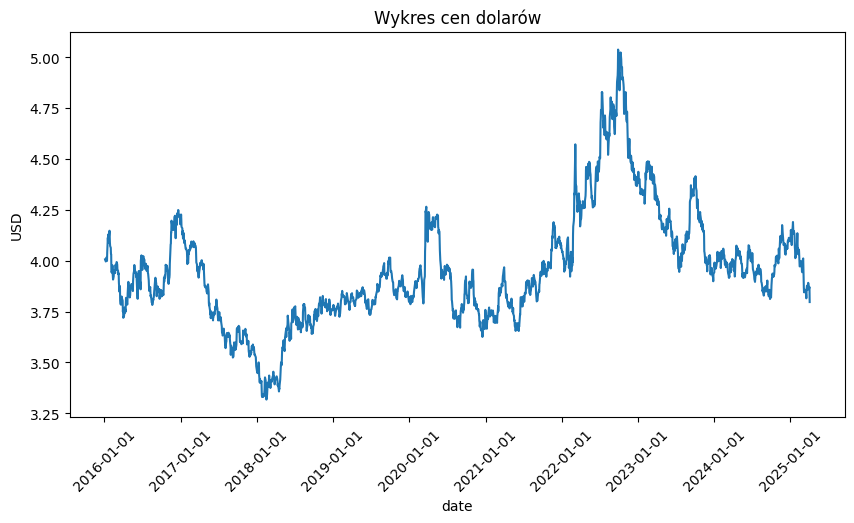

In [85]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(x="date", y="USD", data=df)
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen dolarów")
plt.show()

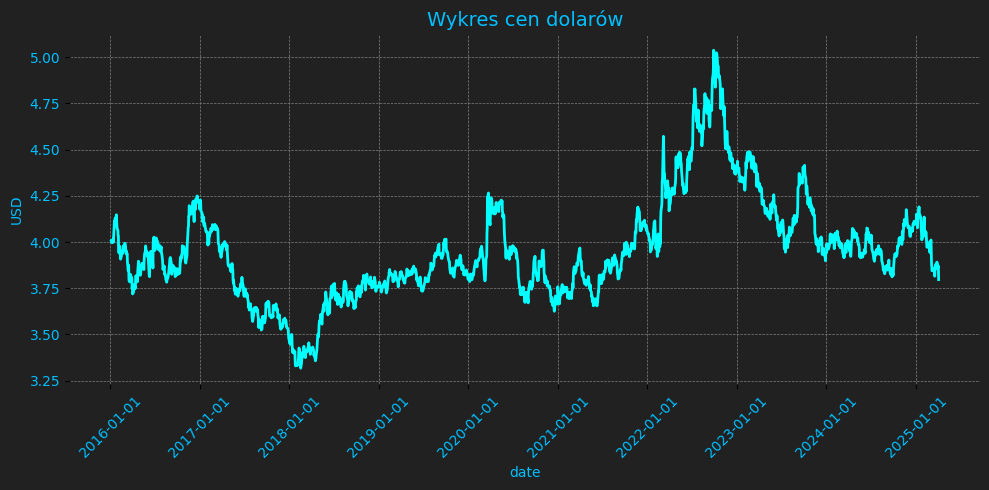

In [86]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="USD", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres cen dolarów", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

ax.xaxis.label.set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


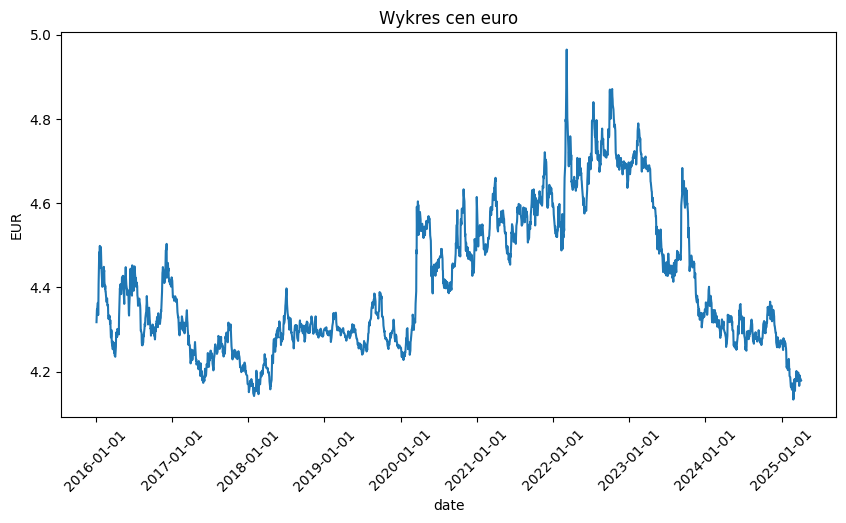

In [87]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="EUR")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen euro")
plt.show()

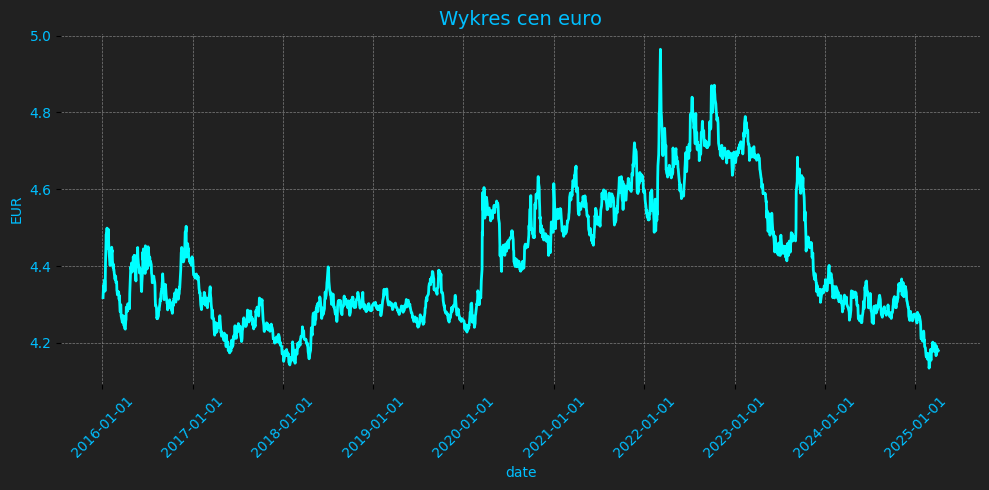

In [88]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="EUR", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres cen euro", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

ax.xaxis.label.set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


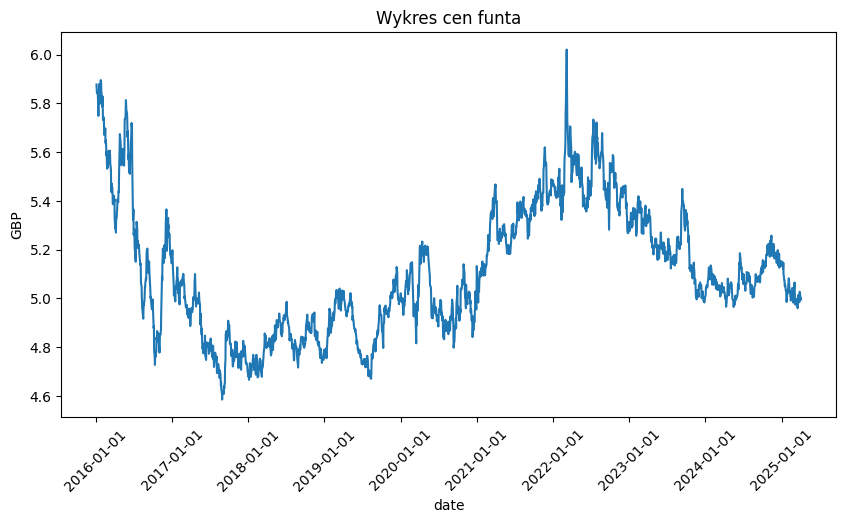

In [89]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="GBP")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres cen funta")
plt.show()

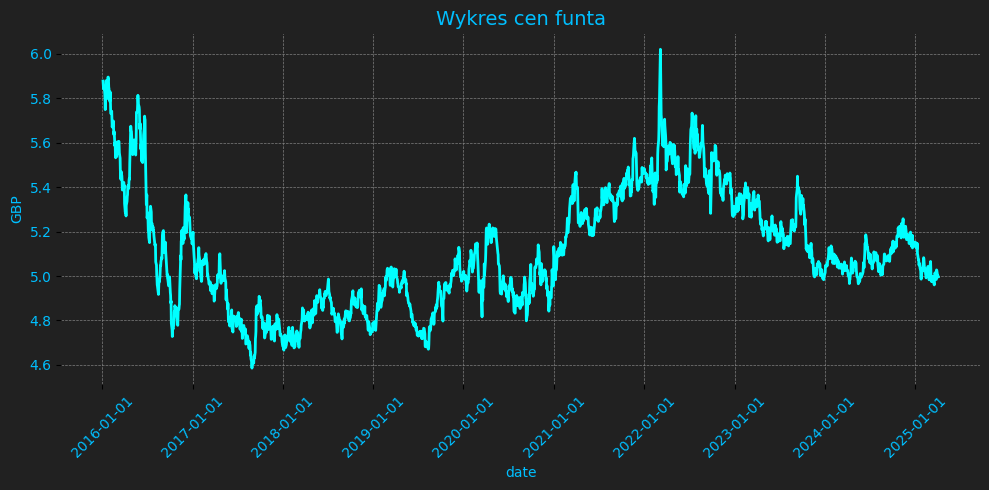

In [90]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="GBP", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres cen funta", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

ax.xaxis.label.set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


In [91]:
df["returns_USD"] = np.log(1 + df["USD"].pct_change()) * 100
df["returns_EUR"] = np.log(1 + df["EUR"].pct_change()) * 100
df["returns_GBP"] = np.log(1 + df["GBP"].pct_change()) * 100

In [18]:
"""df["returns_USD"] = df["USD"].pct_change()
df["returns_EUR"] = df["EUR"].pct_change()
df["returns_GBP"] = df["GBP"].pct_change()"""

'df["returns_USD"] = df["USD"].pct_change()\ndf["returns_EUR"] = df["EUR"].pct_change()\ndf["returns_GBP"] = df["GBP"].pct_change()'

In [92]:
df.dropna(inplace=True)

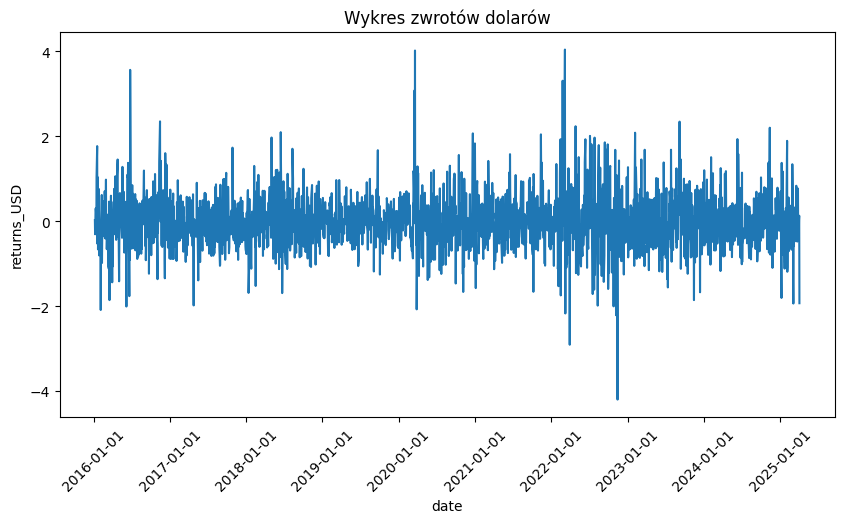

In [93]:
import matplotlib.dates as mdates
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_USD")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów dolarów")
plt.show()

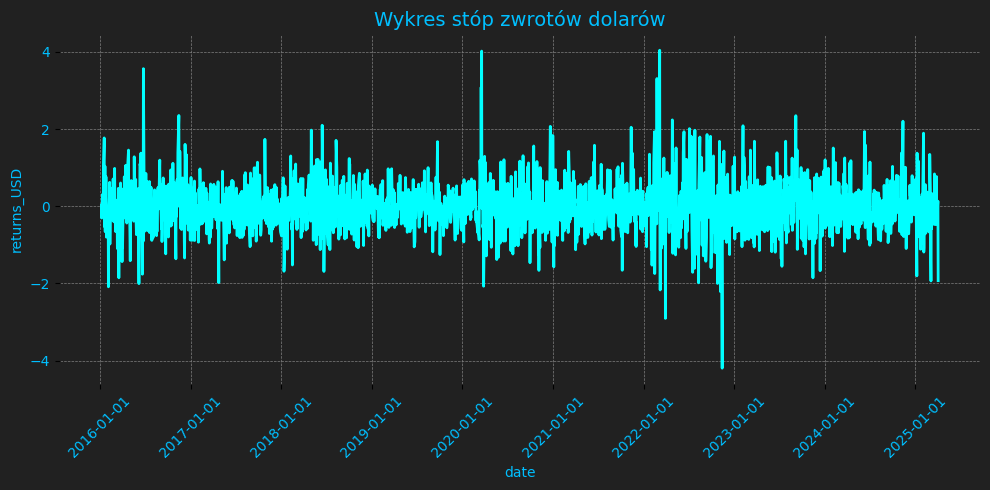

In [94]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="returns_USD", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres stóp zwrotów dolarów", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

ax.xaxis.label.set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


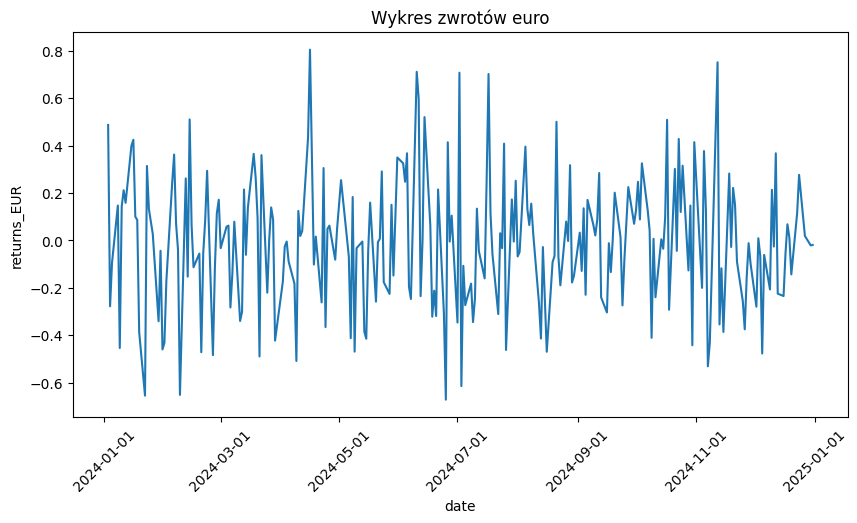

In [22]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_EUR")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów euro")
plt.show()

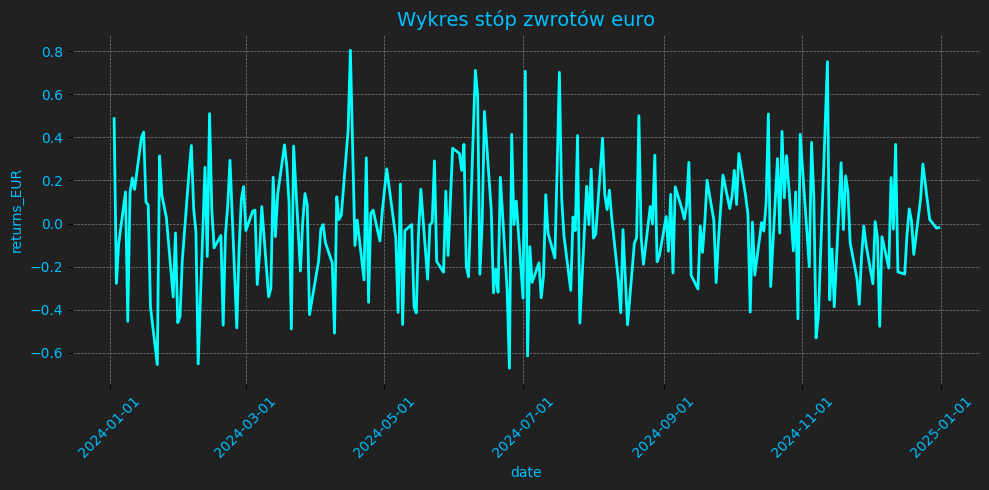

In [23]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="returns_EUR", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres stóp zwrotów euro", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

ax.xaxis.label.set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


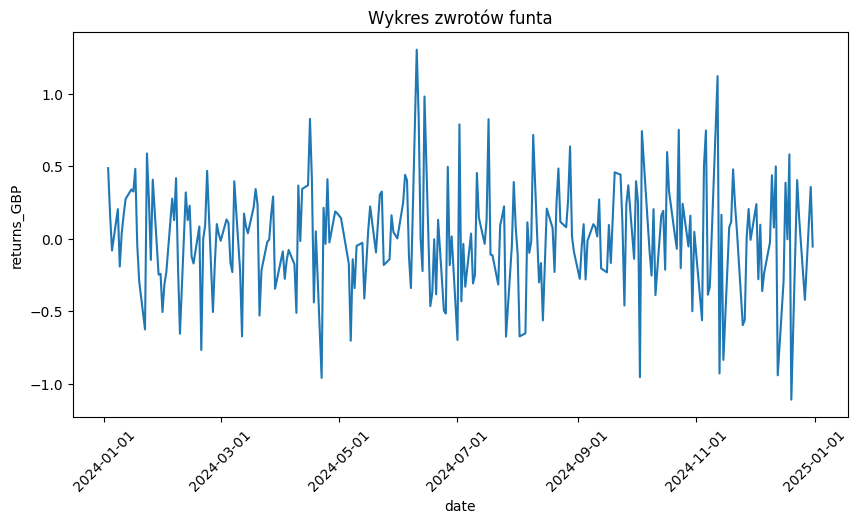

In [24]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df, x="date", y="returns_GBP")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.title("Wykres zwrotów funta")
plt.show()

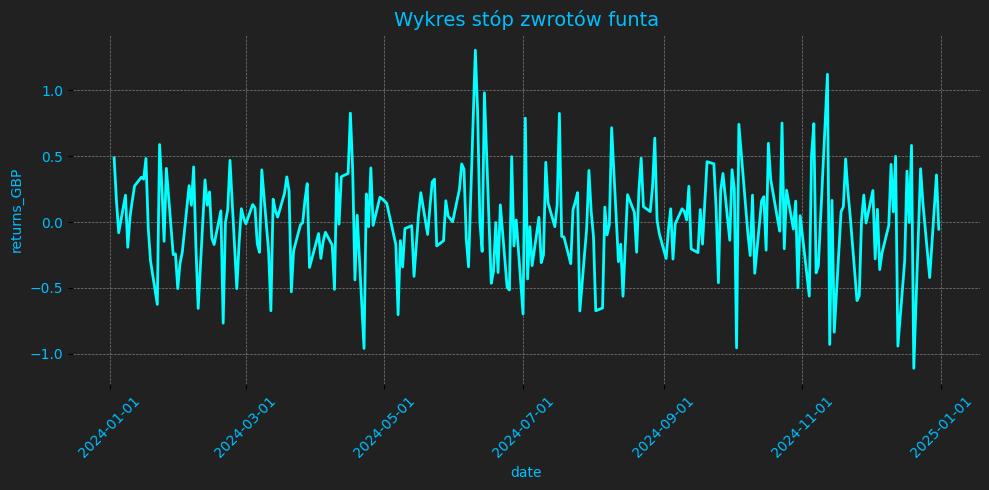

In [25]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="returns_GBP", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres stóp zwrotów funta", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

ax.xaxis.label.set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


Odchylenie standardowe

In [95]:
usd_std = df["returns_USD"].std()
eur_std = df["returns_EUR"].std()
gbp_std = df["returns_GBP"].std()
print(usd_std, eur_std, gbp_std)

0.6380146526117045 0.3539614818417461 0.5576302474484297


Wariancja

In [96]:
usd_var = df["returns_USD"].var()
eur_var = df["returns_EUR"].var()
gbp_var = df["returns_GBP"].var()
print(usd_var, eur_var, gbp_var)

0.40706269694723407 0.12528873062760476 0.31095149286939694


Annualizowane odchylenie standardowe

In [97]:
annualized_usd_std = usd_std * np.sqrt(252) 
annualized_eur_std = eur_std * np.sqrt(252) 
annualized_gbp_std = gbp_std * np.sqrt(252)
print(f"Annualizowane std USD: {annualized_usd_std:.2f}%\nAnnualizowane std EUR: {annualized_eur_std:.2f}%\nAnnualizowane std GBP: {annualized_gbp_std:.2f}%")

Annualizowane std USD: 10.13%
Annualizowane std EUR: 5.62%
Annualizowane std GBP: 8.85%


Średnie

In [98]:
usd_mean = df["returns_USD"].mean()
eur_mean = df["returns_EUR"].mean()
gbp_mean = df["returns_GBP"].mean()
print(usd_mean, eur_mean, gbp_mean)

-0.002312862886043195 -0.0013975044994923862 -0.00696622082190325


Semi std

In [99]:
below_mean_usd = df[df['returns_USD'] < usd_mean]
below_mean_eur = df[df['returns_EUR'] < eur_mean]
below_mean_gbp = df[df['returns_GBP'] < gbp_mean]

semi_std_usd = np.std(below_mean_usd['returns_USD'], ddof=1)
semi_std_eur = np.std(below_mean_eur['returns_EUR'], ddof=1) 
semi_std_gbp = np.std(below_mean_gbp['returns_GBP'], ddof=1)

print(f"Semi std USD: {semi_std_usd:.2f}%\nSemi std EUR: {semi_std_eur:.2f}%\nSemi std GBP: {semi_std_gbp:.2f}%")

Semi std USD: 0.40%
Semi std EUR: 0.22%
Semi std GBP: 0.38%


IQR

In [100]:
iqr_usd = df["returns_USD"].quantile(0.75) - df["returns_USD"].quantile(0.25)
iqr_eur = df["returns_EUR"].quantile(0.75) - df["returns_EUR"].quantile(0.25)
iqr_gbp = df["returns_GBP"].quantile(0.75) - df["returns_GBP"].quantile(0.25)

In [101]:
print(iqr_usd, iqr_eur, iqr_gbp)

0.735262039102277 0.3728173991785593 0.6159400510728399


CV (Coefficient of Variation)

In [33]:
cv_usd = usd_std / abs(usd_mean)
cv_eur = eur_std / abs(eur_mean)
cv_gbp = gbp_std / abs(gbp_mean)

In [34]:
print(cv_usd, cv_eur, cv_gbp)

33.83016096053372 42.330104358822794 36.144820811413446


Dekompozycja - nie trzeba stacjonarne

In [57]:
def adfuller_test(series, sig = 0.05):
    res = adfuller(series, autolag='AIC')    
    p_value = round(res[1], 3) 
    stats   = round(res[0], 3) 

    if p_value <= sig:
        print(f"Statystyka testowa = {stats}, p-Value = {p_value} => Stationary. ")
    else:
        print(f"Statystyka testowa = {stats}, p-value = {p_value} => Non-stationary.")

In [58]:
adfuller_test(df["returns_USD"])
adfuller_test(df["returns_EUR"])
adfuller_test(df["returns_GBP"])

Statystyka testowa = -45.413, p-Value = 0.0 => Stationary. 
Statystyka testowa = -16.114, p-Value = 0.0 => Stationary. 
Statystyka testowa = -46.844, p-Value = 0.0 => Stationary. 


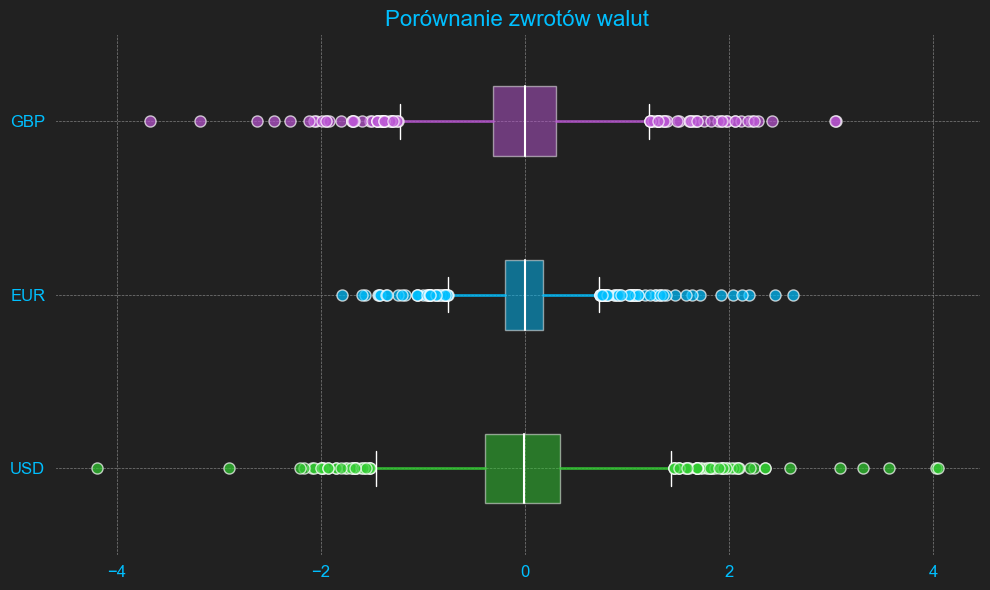

In [116]:
import pandas as pd
import matplotlib.pyplot as plt

# Kolory pudełek
colors = {
    "USD": "limegreen",
    "EUR": "deepskyblue",
    "GBP": "mediumorchid"
}

# Dane
data = [df["returns_USD"].dropna(), df["returns_EUR"].dropna(), df["returns_GBP"].dropna()]
labels = list(colors.keys())

# Większy wykres poziomy
fig, ax = plt.subplots(figsize=(10, 6))  # szerszy wykres, aby zmieścić boxploty poziomo
fig.patch.set_facecolor('#212121')
ax.set_facecolor('#212121')

# Tworzenie boxplotów poziomych
box = ax.boxplot(data, patch_artist=True, vert=False, labels=labels, widths=0.4)  # vert=False zmienia na poziome

# Stylowanie każdego boxplota
for patch, whiskers, caps, median, flier, label in zip(
    box['boxes'],
    zip(*[iter(box['whiskers'])]*2),
    zip(*[iter(box['caps'])]*2),
    box['medians'],
    box['fliers'],
    labels
):
    fill_color = colors[label]

    # Pudełko
    patch.set_facecolor(fill_color)
    patch.set_alpha(0.5)
    patch.set_edgecolor("white")
    patch.set_linewidth(1)

    # Wąsy
    for w in whiskers:
        w.set_color(fill_color)
        w.set_linewidth(2)
        w.set_alpha(0.8)
    for c in caps:
        c.set_color("white")
        c.set_linewidth(1)

    # Mediana
    median.set_color("white")
    median.set_linewidth(1.5)

    # Outliery
    flier.set_markerfacecolor(fill_color)
    flier.set_markeredgecolor("white")
    flier.set_alpha(0.7)
    flier.set_markersize(8)

# Stylowanie osi i tytułu
ax.set_title("Porównanie zwrotów walut", fontsize=16, color='deepskyblue')
ax.tick_params(colors='deepskyblue', labelsize=12)
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Kolorowanie ramki
for spine in ax.spines.values():
    spine.set_color('#212121')

plt.tight_layout()
plt.show()


Histogramy

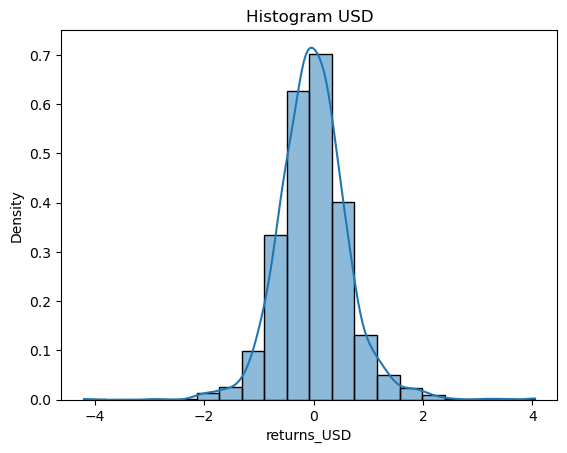

In [59]:
sns.histplot(data=df, x="returns_USD", stat="density",kde = True, bins=20)
plt.title("Histogram USD")
plt.show()

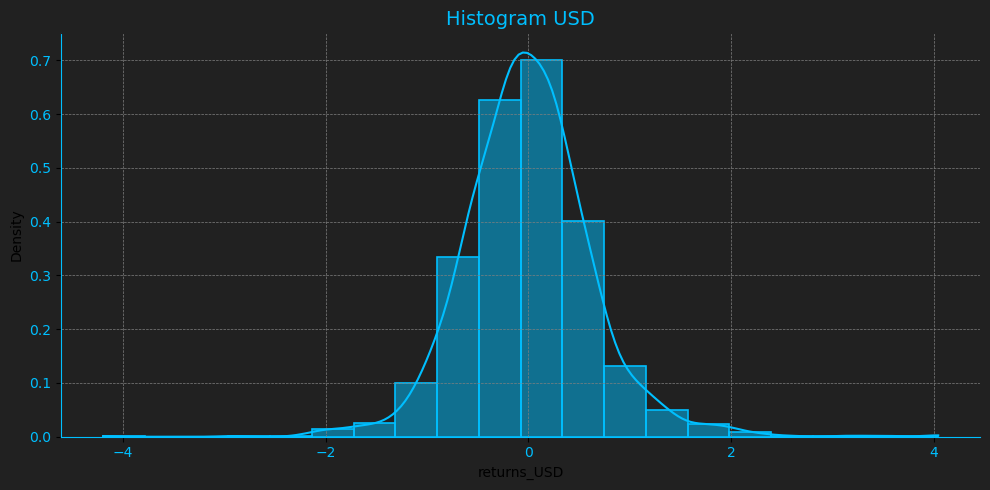

In [60]:
fig, ax = plt.subplots(figsize=(10, 5))

# Ustawienia tła
fig.patch.set_facecolor('#212121')
ax.set_facecolor('#212121')

# Histogram z KDE
sns.histplot(
    data=df, 
    x="returns_USD", 
    stat="density", 
    kde=True, 
    bins=20, 
    color="deepskyblue", 
    edgecolor="#00bfff", 
    linewidth=1.2,
    ax=ax
)

# Tytuł i osie
plt.title("Histogram USD", color='deepskyblue', fontsize=14)
plt.xticks(color='deepskyblue')
plt.yticks(color='deepskyblue')

# Ramki
ax.spines['bottom'].set_color('deepskyblue')
ax.spines['left'].set_color('deepskyblue')
ax.spines['top'].set_color('#212121')   # ukrycie
ax.spines['right'].set_color('#212121') # ukrycie

# Siatka
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Dostosowanie
plt.tight_layout()
plt.show()

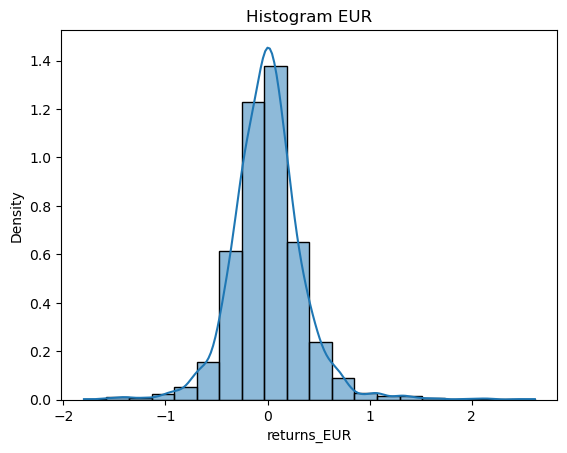

In [61]:
sns.histplot(data=df, x="returns_EUR", stat="density",kde = True, bins=20)
plt.title("Histogram EUR")
plt.show()

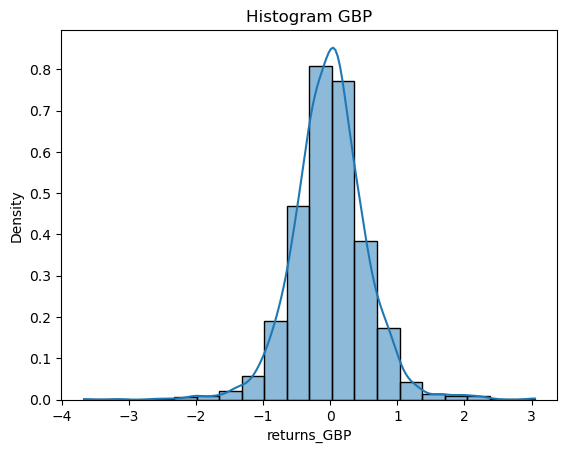

In [62]:
sns.histplot(data=df, x="returns_GBP", stat="density",kde = True, bins=20)
plt.title("Histogram GBP")
plt.show()

Kwantyle

In [64]:
quantiles = [0.05, 0.5, 0.95, 0.975]
result = df[["returns_USD", "returns_EUR", "returns_GBP"]].quantile(q=quantiles)
result = result.T
result.columns = [f"Q{int(q*1000)/10}" for q in quantiles]
print(result)

                 Q5.0     Q50.0     Q95.0     Q97.5
returns_USD -0.942928 -0.013202  1.024440  1.340465
returns_EUR -0.506069 -0.006492  0.537719  0.706051
returns_GBP -0.845146 -0.002047  0.867589  1.047439


Dystrybuanty

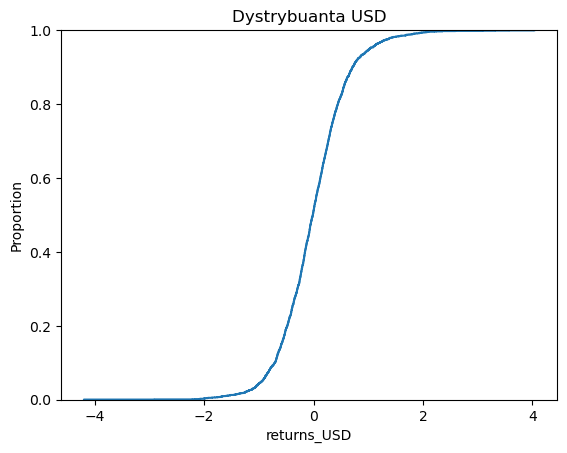

In [65]:
sns.ecdfplot(data=df, x="returns_USD")
plt.title("Dystrybuanta USD")
plt.show()

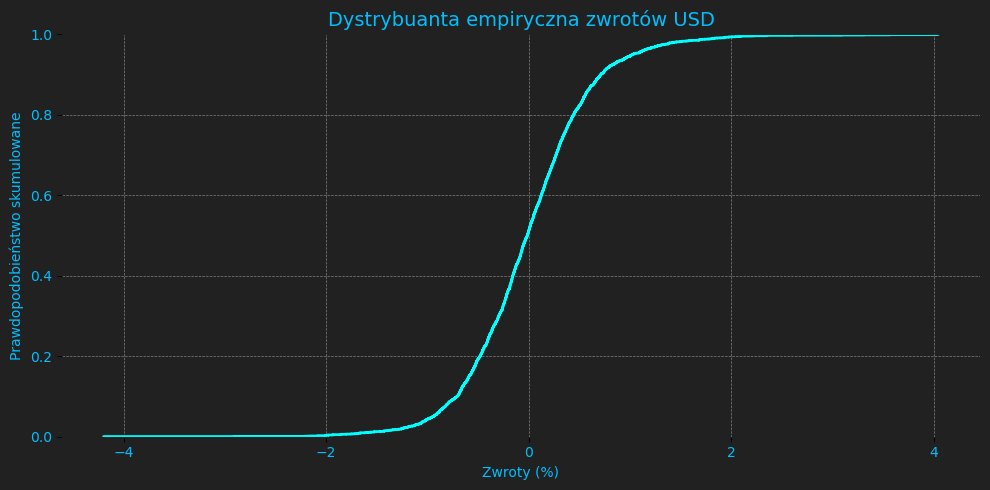

In [66]:
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Wykres dystrybuanty empirycznej
sns.ecdfplot(data=df, x="returns_USD", color="cyan", linewidth=2, ax=ax)

# Tytuł i osie
plt.title("Dystrybuanta empiryczna zwrotów USD", color='deepskyblue', fontsize=14)
plt.xlabel("Zwroty (%)", color='deepskyblue')
plt.ylabel("Prawdopodobieństwo skumulowane", color='deepskyblue')

# Kolory etykiet
plt.xticks(color='deepskyblue')
plt.yticks(color='deepskyblue')

# Siatka i ramki
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')
ax.spines['right'].set_color('#212121')

ax.xaxis.label.set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')

# Dostosowanie układu
plt.tight_layout()
plt.show()

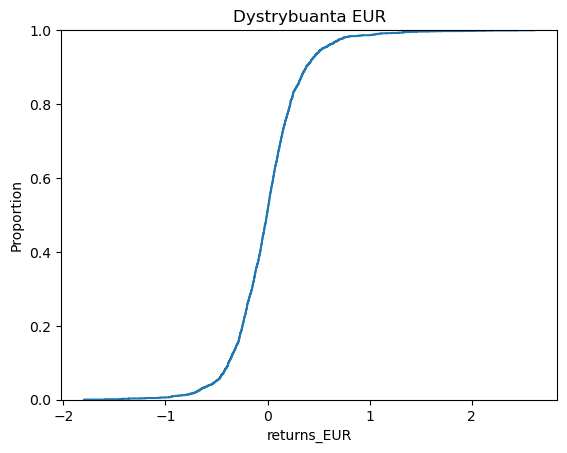

In [67]:
sns.ecdfplot(data=df, x="returns_EUR")
plt.title("Dystrybuanta EUR")
plt.show()

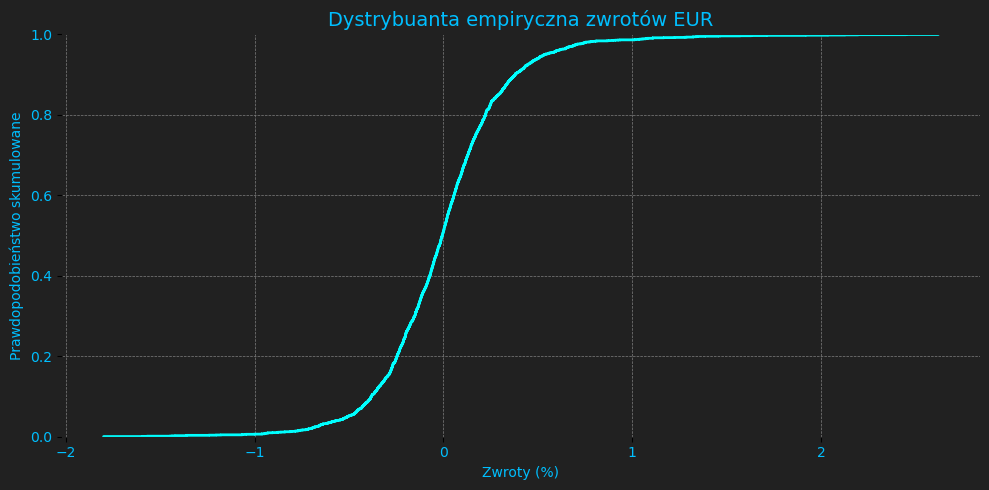

In [68]:
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Wykres dystrybuanty empirycznej
sns.ecdfplot(data=df, x="returns_EUR", color="cyan", linewidth=2, ax=ax)

# Tytuł i osie
plt.title("Dystrybuanta empiryczna zwrotów EUR", color='deepskyblue', fontsize=14)
plt.xlabel("Zwroty (%)", color='deepskyblue')
plt.ylabel("Prawdopodobieństwo skumulowane", color='deepskyblue')

# Kolory etykiet
plt.xticks(color='deepskyblue')
plt.yticks(color='deepskyblue')

# Siatka i ramki
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')
ax.spines['right'].set_color('#212121')

ax.xaxis.label.set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')

# Dostosowanie układu
plt.tight_layout()
plt.show()

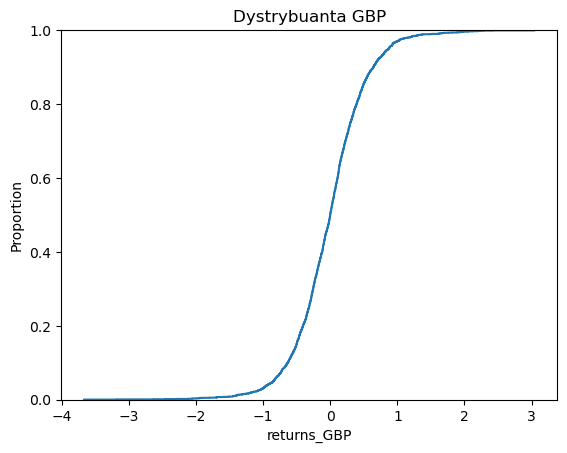

In [69]:
sns.ecdfplot(data=df, x="returns_GBP")
plt.title("Dystrybuanta GBP")
plt.show()

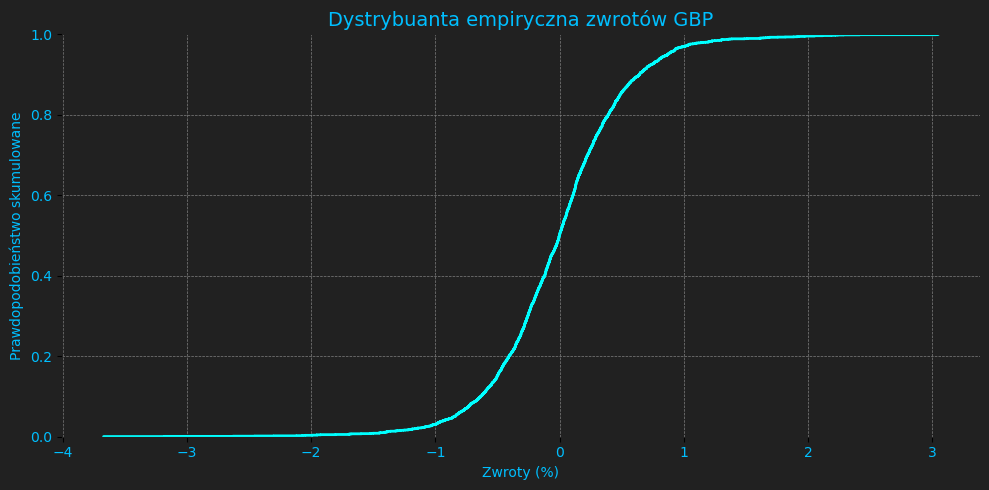

In [70]:
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Wykres dystrybuanty empirycznej
sns.ecdfplot(data=df, x="returns_GBP", color="cyan", linewidth=2, ax=ax)

# Tytuł i osie
plt.title("Dystrybuanta empiryczna zwrotów GBP", color='deepskyblue', fontsize=14)
plt.xlabel("Zwroty (%)", color='deepskyblue')
plt.ylabel("Prawdopodobieństwo skumulowane", color='deepskyblue')

# Kolory etykiet
plt.xticks(color='deepskyblue')
plt.yticks(color='deepskyblue')

# Siatka i ramki
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')
ax.spines['right'].set_color('#212121')

ax.xaxis.label.set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')

# Dostosowanie układu
plt.tight_layout()
plt.show() 

In [77]:
thresholds = [-1, -0.5, 0, 0.5, 1]
cdf_result = pd.DataFrame(index=thresholds)

for col in ["returns_USD", "returns_EUR", "returns_GBP"]:
    cdf_result[col] = [ (df[col] <= t).mean() for t in thresholds ]

cdf_result = cdf_result.T
cdf_result.columns = [f"F({t})" for t in thresholds]

print(cdf_result)

                F(-1)   F(-0.5)      F(0)    F(0.5)      F(1)
returns_USD  0.043236  0.193065  0.512842  0.822346  0.945634
returns_EUR  0.006421  0.051370  0.511986  0.939640  0.986301
returns_GBP  0.030394  0.151969  0.502568  0.856164  0.969606


In [78]:
import scipy.stats as stats
from scipy.stats import norm

# Dopasowanie rozkładu normalnego
mu, std = stats.norm.fit(df['returns_USD'].dropna())
print("Dopasowany rozkład normalny (USD): μ =", mu, ", σ =", std)

# Dopasowanie t-Studenta
df_t, loc_t, scale_t = stats.t.fit(df['returns_USD'].dropna())
print("Dopasowany rozkład t-Studenta: df =", df_t, ", loc =", loc_t, ", scale =", scale_t)

# Można dopasować inne rozkłady np. Laplace, lognormal, Cauchy itd.
std_ann = std * np.sqrt(252)
semi_std = std * np.sqrt(0.5)
iqr = norm.ppf(0.75, mu, std) - norm.ppf(0.25, mu, std)
cv = std / abs(mu)
print(mu, std, std_ann, semi_std, iqr, cv)

Dopasowany rozkład normalny (USD): μ = -0.0008665206436163208 , σ = 0.6389814203214759
Dopasowany rozkład t-Studenta: df = 5.076574942949971 , loc = -0.015837399684430313 , scale = 0.4966036489560547
-0.0008665206436163208 0.6389814203214759 10.143515583368755 0.45182809536152724 0.8619728371451395 737.4104991368272


# Zadanie 2

Wagi portfolio - proporcjonalne do zmienności, risk-parity light

In [79]:
inv_vol_usd = 1 / usd_std
inv_vol_eur = 1 / eur_std

w_usd = inv_vol_usd / (inv_vol_usd + inv_vol_eur)
w_eur = inv_vol_eur / (inv_vol_usd + inv_vol_eur)

In [80]:
print(w_usd, w_eur)

0.35780960717784827 0.6421903928221517


In [81]:
w_usd = 0.08
w_eur = 0.37
w_gbp = 0.55

In [82]:
weights = np.array([w_usd, w_eur, w_gbp])

Portfel

In [83]:
df["portfolio"] = w_usd * df["returns_USD"] + w_eur * df["returns_EUR"] + w_gbp * df["returns_GBP"]


Zwroty portfela

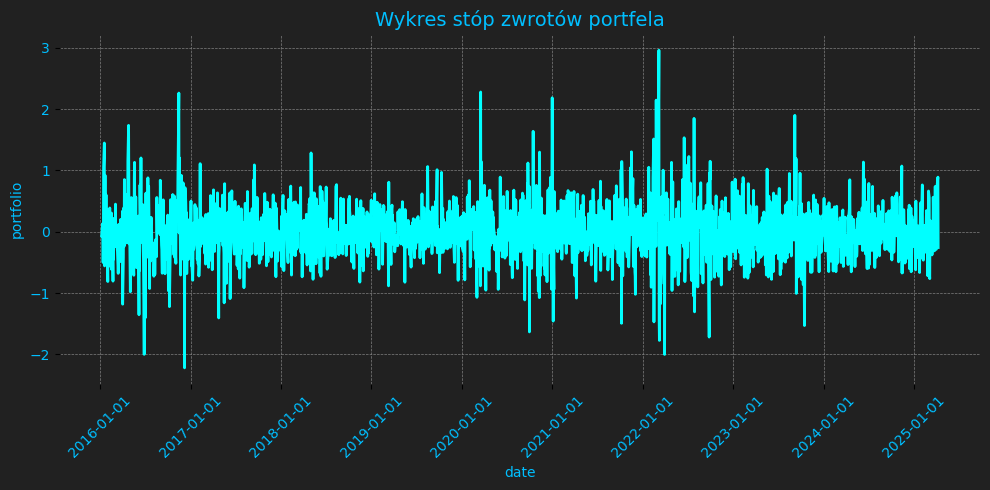

In [84]:


# Tworzenie wykresu
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Rysowanie wykresu
sns.lineplot(x="date", y="portfolio", data=df, color="cyan", linewidth=2, ax=ax)

# Ustawienia osi X (daty)
ax.xaxis.set_major_locator(mdates.AutoDateLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m-%d"))
plt.xticks(rotation=45, color='deepskyblue')
plt.yticks(color='deepskyblue')

# Tytuł
plt.title("Wykres stóp zwrotów portfela", color='deepskyblue', fontsize=14)

# Siatka i kolory osi
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')   # ukrycie górnej ramki
ax.spines['right'].set_color('#212121') # ukrycie prawej ramki

ax.xaxis.label.set_color('deepskyblue')
ax.yaxis.label.set_color('deepskyblue')

# Dostosowanie wyglądu
plt.tight_layout()
plt.show()


Macierz korelacji

In [86]:
df[["returns_USD", "returns_EUR", "returns_GBP", "portfolio"]].corr() 

,returns_USD,returns_EUR,returns_GBP,portfolio
returns_USD,1.000000,0.705997,0.506970,0.699002
returns_EUR,0.705997,1.000000,0.548350,0.783912
returns_GBP,0.506970,0.548350,1.000000,0.944431
portfolio,0.699002,0.783912,0.944431,1.000000


Odchylenie standardowe portfela

In [87]:
portf_std = df["portfolio"].std()

print(portf_std)

0.42860202097009037


Macierz kowariancji

In [76]:
cov_matrix = df[["returns_USD", "returns_EUR", "returns_GBP"]].cov()

In [77]:
print(cov_matrix)

             returns_USD  returns_EUR  returns_GBP
returns_USD     0.408472     0.160677     0.180632
returns_EUR     0.160677     0.126806     0.108858
returns_GBP     0.180632     0.108858     0.310787


Wariancja portfela

In [88]:
portf_var = df["portfolio"].var()

print(portf_var)

0.18369969237964578


In [89]:
port_variance = np.dot(weights.T, np.dot(cov_matrix, weights))

NameError: name 'cov_matrix' is not defined

In [90]:
print(port_variance)

NameError: name 'port_variance' is not defined

Annualizowane odchylenie standardowe portfela

In [92]:
annualized_portf_std = portf_std * np.sqrt(252)
print(f"Annualizowane std portfela: {annualized_portf_std:.2f}%")

Annualizowane std portfela: 6.80%


Średnia portfela

In [94]:
portf_mean = df["portfolio"].mean()

print(portf_mean)

-0.00392629194268518


Semi std portfela

In [97]:
below_mean_portf = df[df['portfolio'] < portf_mean]

semi_std_portf = np.std(below_mean_portf['portfolio'], ddof=1)

print(f"Semi std portfela: {semi_std_portf:.2f}%")

Semi std portfela: 0.27%


IQR portfela

In [98]:
iqr_portf = df["portfolio"].quantile(0.75) - df["portfolio"].quantile(0.25)
print(iqr_portf)

0.4817835168138872


Stacjonarność portfela

In [ ]:
adfuller_test(df["portfolio"])

Statystyka testowa = -45.777, p-Value = 0.0 => Stationary. 


In [100]:
cv_port = portf_std / abs(portf_mean)
print(cv_port)

109.16203563736288


Histogram portfela

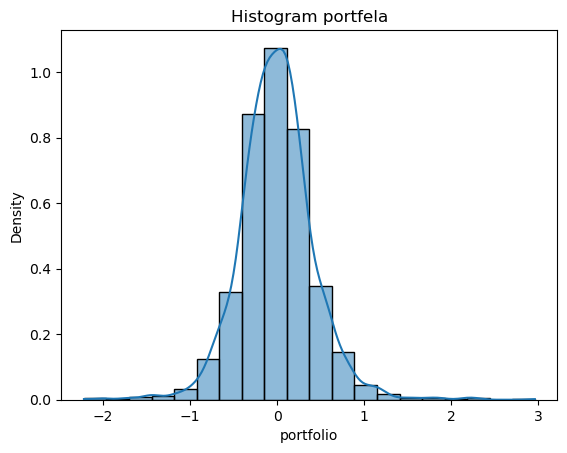

In [87]:
sns.histplot(data=df, x="portfolio", stat="density", kde = True, bins=20)
plt.title("Histogram portfela")
plt.show()

Kwantyle portfela

In [101]:
quantiles = [0.05, 0.5, 0.95, 0.975]
result_portf = df["portfolio"].quantile(q=quantiles)
result_portf = result_portf.T
result_portf.columns = [f"Q{int(q*1000)/10}" for q in quantiles]
print(result_portf)

0.050   -0.655509
0.500   -0.013097
0.950    0.666158
0.975    0.850091
Name: portfolio, dtype: float64


Dystrybuanta portfela

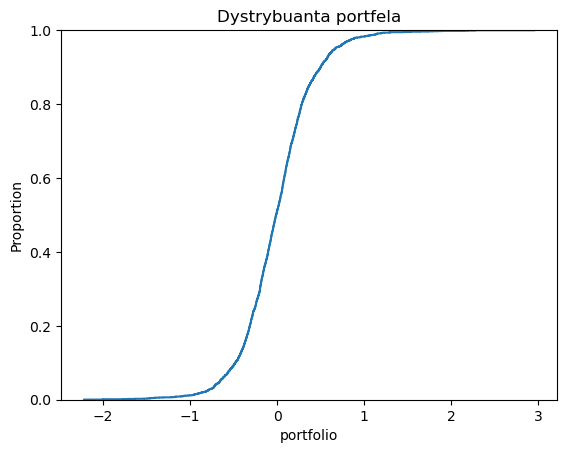

In [89]:
sns.ecdfplot(data=df, x="portfolio")
plt.title("Dystrybuanta portfela")
plt.show()

In [90]:
cdf_portfolio = pd.Series({f"F({t})": (df["portfolio"] <= t).mean() for t in thresholds}).to_frame().T

print(cdf_portfolio)

   F(-0.01)  F(-0.005)      F(0)  F(0.005)   F(0.01)
0  0.502568   0.505993  0.511558  0.516267  0.519264


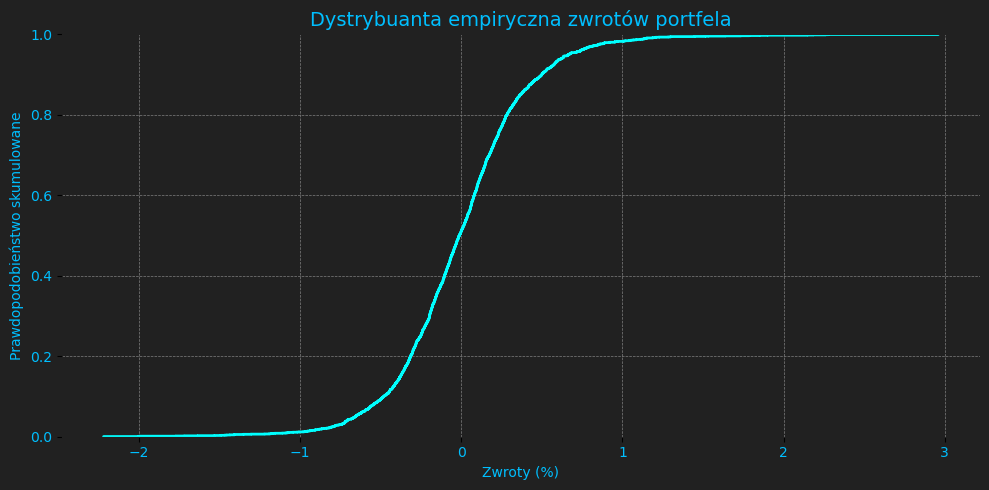

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))

# Tło wykresu
fig.patch.set_facecolor('#212121')  # tło całej figury
ax.set_facecolor('#212121')         # tło samego wykresu

# Wykres dystrybuanty empirycznej
sns.ecdfplot(data=df, x="portfolio", color="cyan", linewidth=2, ax=ax)

# Tytuł i osie
plt.title("Dystrybuanta empiryczna zwrotów portfela", color='deepskyblue', fontsize=14)
plt.xlabel("Zwroty (%)", color='deepskyblue')
plt.ylabel("Prawdopodobieństwo skumulowane", color='deepskyblue')

# Kolory etykiet
plt.xticks(color='deepskyblue')
plt.yticks(color='deepskyblue')

# Siatka i ramki
ax.grid(color='gray', linestyle='--', linewidth=0.5)
ax.spines['bottom'].set_color('#212121')
ax.spines['left'].set_color('#212121')
ax.spines['top'].set_color('#212121')
ax.spines['right'].set_color('#212121')

# Dostosowanie układu
plt.tight_layout()
plt.show()

In [103]:
cdf_portfolio = pd.Series({f"F({t})": (df["portfolio"] <= t).mean() for t in thresholds}).to_frame().T

print(cdf_portfolio)

      F(-1)   F(-0.5)      F(0)    F(0.5)      F(1)
0  0.011986  0.092894  0.511558  0.899829  0.982449


Dystrybuanty dwuwymiarowe

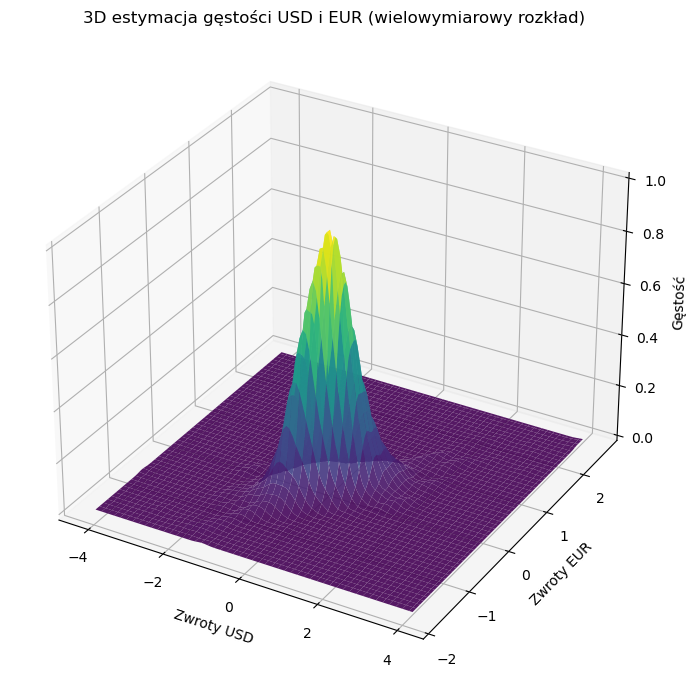

In [91]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

X = df[["returns_USD", "returns_EUR"]].dropna().to_numpy().T

kde = gaussian_kde(X)

x_min, x_max = df["returns_USD"].min(), df["returns_USD"].max()
y_min, y_max = df["returns_EUR"].min(), df["returns_EUR"].max()

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])

z = kde(positions).reshape(x.shape)
z = z / z.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel("Zwroty USD")
ax.set_ylabel("Zwroty EUR")
ax.set_zlabel("Gęstość")
ax.set_title("3D estymacja gęstości USD i EUR (wielowymiarowy rozkład)")

plt.tight_layout()
plt.show()

In [92]:
x_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 
y_thresh = [-0.01, -0.005, 0, 0.005, 0.01] 

cdf_matrix = np.zeros((len(x_thresh), len(y_thresh)))

for i, a in enumerate(x_thresh):
    for j, b in enumerate(y_thresh):
        cdf_matrix[i, j] = ((df["returns_USD"] <= a) & (df["returns_EUR"] <= b)).mean()

cdf_df = pd.DataFrame(cdf_matrix, index=[f"USD ≤ {round(a, 4)}" for a in x_thresh],
                                     columns=[f"EUR ≤ {round(b, 4)}" for b in y_thresh])

print(cdf_df)


              EUR ≤ -0.01  EUR ≤ -0.005   EUR ≤ 0  EUR ≤ 0.005  EUR ≤ 0.01
USD ≤ -0.01      0.366010      0.369863  0.376284     0.380993    0.385274
USD ≤ -0.005     0.368579      0.372432  0.378853     0.383562    0.387842
USD ≤ 0          0.370719      0.374572  0.381421     0.386130    0.390411
USD ≤ 0.005      0.371147      0.375000  0.381849     0.386558    0.390839
USD ≤ 0.01       0.374144      0.377997  0.384846     0.389555    0.394264


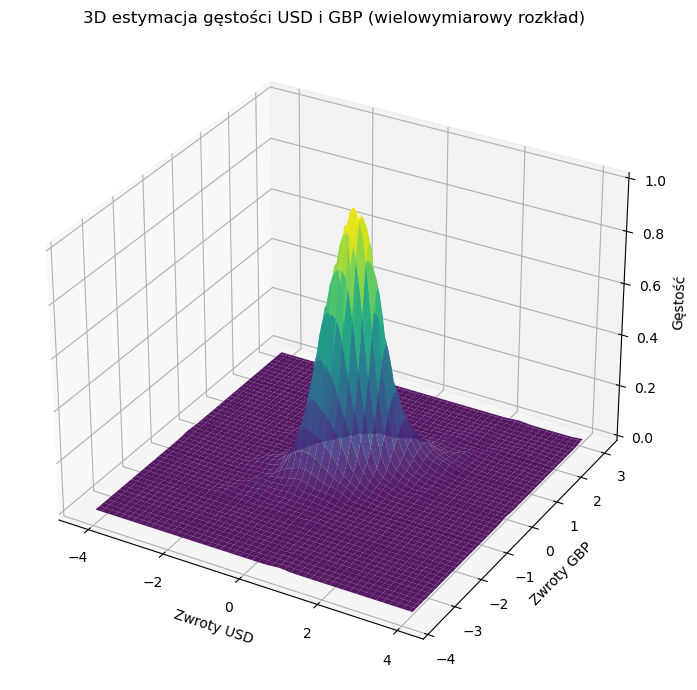

In [93]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

X = df[["returns_USD", "returns_GBP"]].dropna().to_numpy().T

kde = gaussian_kde(X)

x_min, x_max = df["returns_USD"].min(), df["returns_USD"].max()
y_min, y_max = df["returns_GBP"].min(), df["returns_GBP"].max()

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])

z = kde(positions).reshape(x.shape)
z = z / z.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel("Zwroty USD")
ax.set_ylabel("Zwroty GBP")
ax.set_zlabel("Gęstość")
ax.set_title("3D estymacja gęstości USD i GBP (wielowymiarowy rozkład)")

plt.tight_layout()
plt.show()

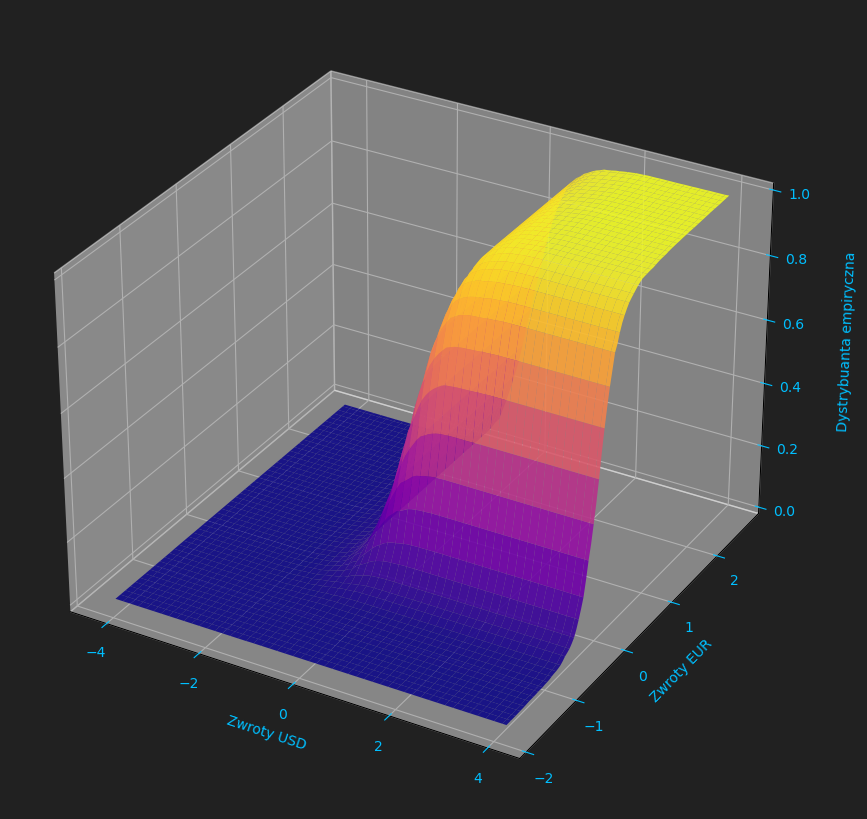

In [104]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Dane
X = df[["returns_USD", "returns_EUR"]].dropna().to_numpy()

# Siatka
x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x, y)

# Obliczanie dystrybuanty empirycznej
cdf = np.zeros_like(X_grid)

for i in range(len(x)):
    for j in range(len(y)):
        cdf[j, i] = np.mean((X[:, 0] <= x[i]) & (X[:, 1] <= y[j]))

# Normalizacja (opcjonalnie)
cdf = cdf / cdf.max()

# Tworzenie wykresu
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tło
fig.patch.set_facecolor('#212121')
ax.set_facecolor('#212121')

# Powierzchnia
surf = ax.plot_surface(X_grid, Y_grid, cdf, cmap='plasma', edgecolor='none', alpha=0.9)

# Etykiety
ax.set_xlabel("Zwroty USD", color='deepskyblue')
ax.set_ylabel("Zwroty EUR", color='deepskyblue')
ax.set_zlabel("Dystrybuanta empiryczna", labelpad=15, color='deepskyblue')

# Ticks
ax.tick_params(colors='deepskyblue')

# Siatka
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Dopasowanie
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.show()

In [110]:
x_thresh = [-1, -0.5, 0, 0.5, 1] 
y_thresh = [-1, -0.5, 0, 0.5, 1] 

cdf_matrix = np.zeros((len(x_thresh), len(y_thresh)))

for i, a in enumerate(x_thresh):
    for j, b in enumerate(y_thresh):
        cdf_matrix[i, j] = ((df["returns_USD"] <= a) & (df["returns_EUR"] <= b)).mean()

cdf_df = pd.DataFrame(cdf_matrix, index=[f"USD ≤ {round(a, 4)}" for a in x_thresh],
                                     columns=[f"EUR ≤ {round(b, 4)}" for b in y_thresh])

print(cdf_df)

            EUR ≤ -1  EUR ≤ -0.5   EUR ≤ 0  EUR ≤ 0.5   EUR ≤ 1
USD ≤ -1    0.005565    0.019264  0.039812   0.043236  0.043236
USD ≤ -0.5  0.005993    0.038527  0.168664   0.192209  0.192637
USD ≤ 0     0.006421    0.050514  0.381421   0.509846  0.511986
USD ≤ 0.5   0.006421    0.050942  0.490582   0.810360  0.821490
USD ≤ 1     0.006421    0.051370  0.510274   0.915668  0.944777


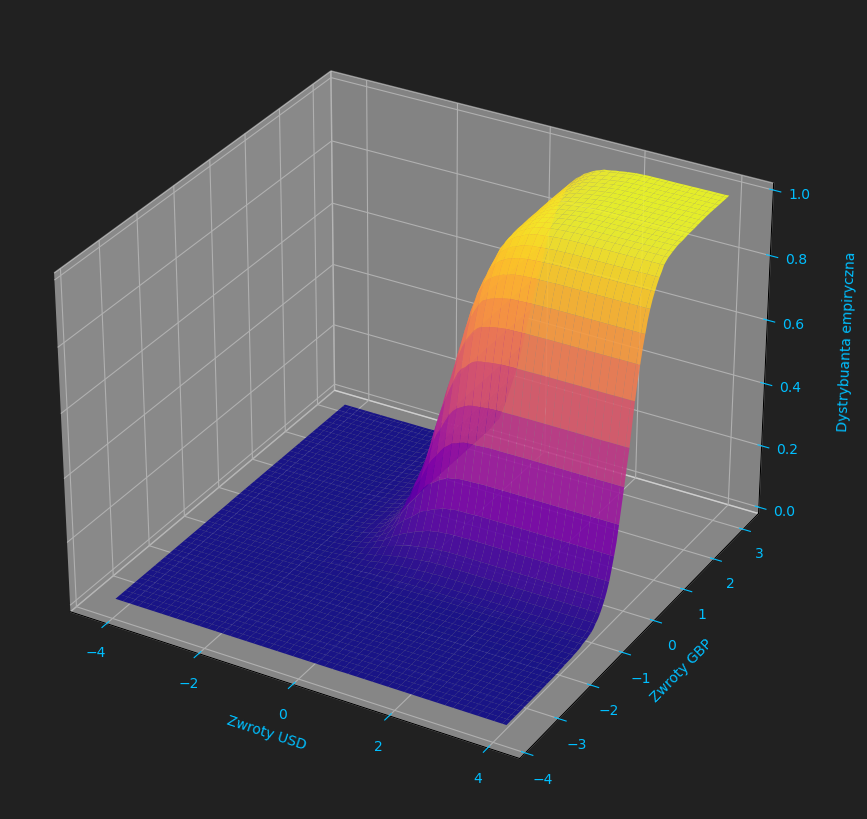

In [105]:
X = df[["returns_USD", "returns_GBP"]].dropna().to_numpy()

# Siatka
x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x, y)

# Obliczanie dystrybuanty empirycznej
cdf = np.zeros_like(X_grid)

for i in range(len(x)):
    for j in range(len(y)):
        cdf[j, i] = np.mean((X[:, 0] <= x[i]) & (X[:, 1] <= y[j]))

# Normalizacja (opcjonalnie)
cdf = cdf / cdf.max()

# Tworzenie wykresu
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tło
fig.patch.set_facecolor('#212121')
ax.set_facecolor('#212121')

# Powierzchnia
surf = ax.plot_surface(X_grid, Y_grid, cdf, cmap='plasma', edgecolor='none', alpha=0.9)

# Etykiety
ax.set_xlabel("Zwroty USD", color='deepskyblue')
ax.set_ylabel("Zwroty GBP", color='deepskyblue')
ax.set_zlabel("Dystrybuanta empiryczna", labelpad=15, color='deepskyblue')

# Ticks
ax.tick_params(colors='deepskyblue')

# Siatka
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Dopasowanie
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.show()

In [108]:
x_thresh = [-1, -0.5, 0, 0.5, 1] 
y_thresh = [-1, -0.5, 0, 0.5, 1]

cdf_matrix = np.zeros((len(x_thresh), len(y_thresh)))

for i, a in enumerate(x_thresh):
    for j, b in enumerate(y_thresh):
        cdf_matrix[i, j] = ((df["returns_USD"] <= a) & (df["returns_GBP"] <= b)).mean()

cdf_df = pd.DataFrame(cdf_matrix, index=[f"USD ≤ {round(a, 4)}" for a in x_thresh],
                                     columns=[f"GBP ≤ {round(b, 4)}" for b in y_thresh])

print(cdf_df)


            GBP ≤ -1  GBP ≤ -0.5   GBP ≤ 0  GBP ≤ 0.5   GBP ≤ 1
USD ≤ -1    0.010702    0.026541  0.038955   0.041952  0.042380
USD ≤ -0.5  0.019264    0.076199  0.157962   0.185788  0.190068
USD ≤ 0     0.024401    0.119863  0.351455   0.484161  0.506421
USD ≤ 0.5   0.029110    0.145548  0.470890   0.751284  0.812500
USD ≤ 1     0.029966    0.150257  0.495719   0.838613  0.931507


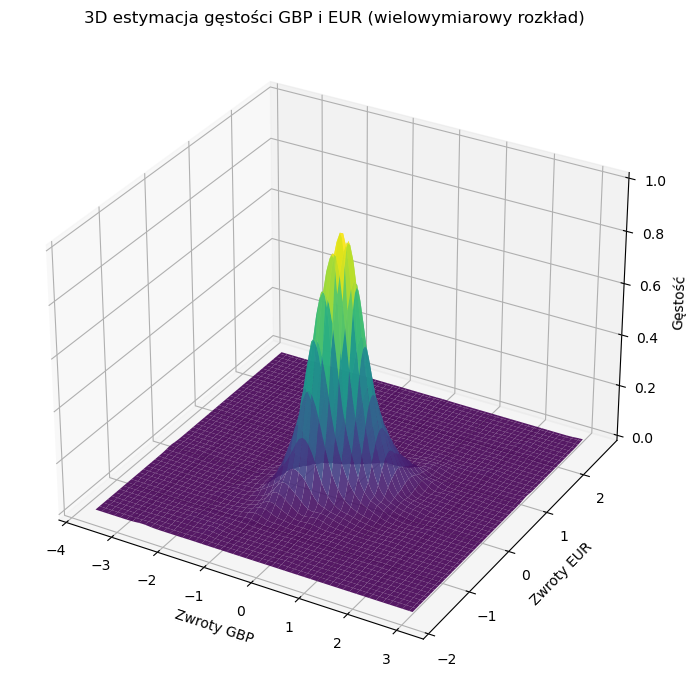

In [95]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D

X = df[["returns_GBP", "returns_EUR"]].dropna().to_numpy().T

kde = gaussian_kde(X)

x_min, x_max = df["returns_GBP"].min(), df["returns_GBP"].max()
y_min, y_max = df["returns_EUR"].min(), df["returns_EUR"].max()

x, y = np.mgrid[x_min:x_max:100j, y_min:y_max:100j]
positions = np.vstack([x.ravel(), y.ravel()])

z = kde(positions).reshape(x.shape)
z = z / z.max()

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)

ax.set_xlabel("Zwroty GBP")
ax.set_ylabel("Zwroty EUR")
ax.set_zlabel("Gęstość")
ax.set_title("3D estymacja gęstości GBP i EUR (wielowymiarowy rozkład)")

plt.tight_layout()
plt.show()

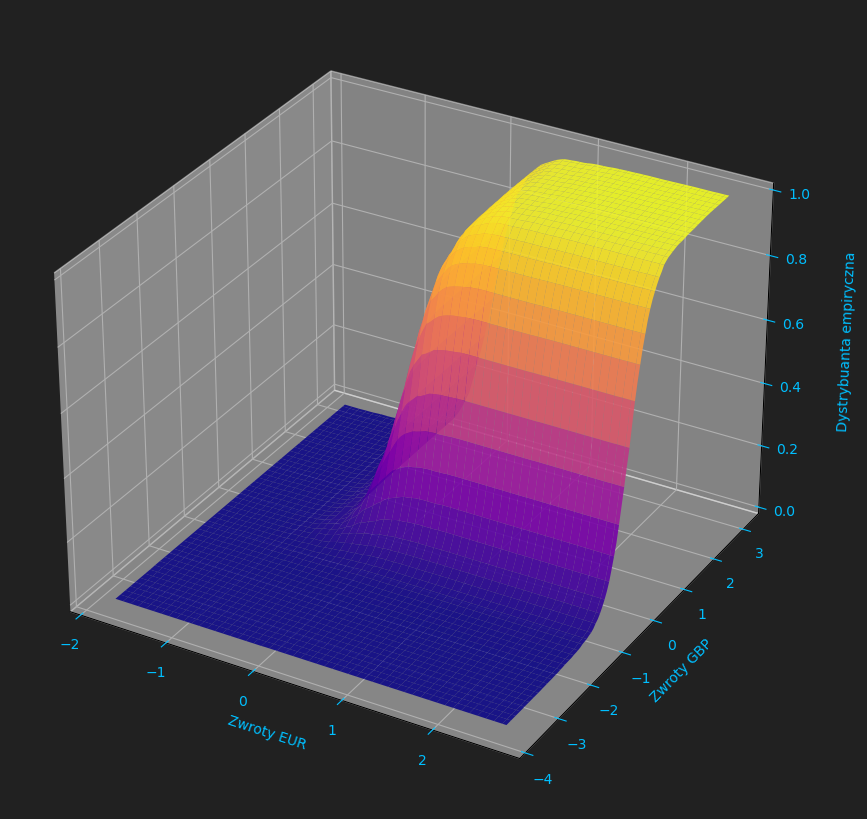

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm

# Dane
X = df[["returns_EUR", "returns_GBP"]].dropna().to_numpy()

# Siatka
x = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
X_grid, Y_grid = np.meshgrid(x, y)

# Obliczanie dystrybuanty empirycznej
cdf = np.zeros_like(X_grid)

for i in range(len(x)):
    for j in range(len(y)):
        cdf[j, i] = np.mean((X[:, 0] <= x[i]) & (X[:, 1] <= y[j]))

# Normalizacja (opcjonalnie)
cdf = cdf / cdf.max()

# Tworzenie wykresu
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Tło
fig.patch.set_facecolor('#212121')
ax.set_facecolor('#212121')

# Powierzchnia
surf = ax.plot_surface(X_grid, Y_grid, cdf, cmap='plasma', edgecolor='none', alpha=0.9)

# Etykiety
ax.set_xlabel("Zwroty EUR", color='deepskyblue')
ax.set_ylabel("Zwroty GBP", color='deepskyblue')
ax.set_zlabel("Dystrybuanta empiryczna", labelpad=15, color='deepskyblue')

# Ticks
ax.tick_params(colors='deepskyblue')

# Siatka
ax.grid(color='gray', linestyle='--', linewidth=0.5)

# Dopasowanie
plt.subplots_adjust(left=0, right=1, bottom=0, top=1)
plt.show()


In [109]:
x_thresh = [-1, -0.5, 0, 0.5, 1] 
y_thresh = [-1, -0.5, 0, 0.5, 1]  

cdf_matrix = np.zeros((len(x_thresh), len(y_thresh)))

for i, a in enumerate(x_thresh):
    for j, b in enumerate(y_thresh):
        cdf_matrix[i, j] = ((df["returns_EUR"] <= a) & (df["returns_GBP"] <= b)).mean()

cdf_df = pd.DataFrame(cdf_matrix, index=[f"EUR ≤ {round(a, 4)}" for a in x_thresh],
                                     columns=[f"GBP ≤ {round(b, 4)}" for b in y_thresh])

print(cdf_df)

            GBP ≤ -1  GBP ≤ -0.5   GBP ≤ 0  GBP ≤ 0.5   GBP ≤ 1
EUR ≤ -1    0.004281    0.005137  0.005137   0.005993  0.005993
EUR ≤ -0.5  0.010274    0.033390  0.042380   0.048801  0.050514
EUR ≤ 0     0.025257    0.118151  0.354452   0.487586  0.507277
EUR ≤ 0.5   0.029538    0.149401  0.497003   0.835188  0.925086
EUR ≤ 1     0.029966    0.151541  0.501712   0.854024  0.964469


In [82]:
from fitter import Fitter

# Dane
data = df["returns_USD"].dropna()

# Dopasowanie wielu rozkładów na raz
f = Fitter(data, distributions=['norm', 'lognorm', 'expon', 'gamma', 'beta'])
f.fit()

# Wyniki
f.summary()

ModuleNotFoundError: No module named 'fitter'

In [ ]:
print(f.get_best())

{'lognorm': {'s': 0.18640991495611736, 'loc': -2.757320180634427, 'scale': 2.7204122802011863}}


In [ ]:
from scipy.stats import lognorm

shape, loc, scale = lognorm.fit(data)

# Średnia i std log-normalnego
mean = scale * np.exp(shape**2 / 2)
std_dev = scale * np.sqrt((np.exp(shape**2) - 1) * np.exp(shape**2))

print(f"Średnia (lognormal): {mean:.4f}")
print(f"Odchylenie standardowe (lognormal): {std_dev:.4f}")

Średnia (lognormal): 2.7681
Odchylenie standardowe (lognormal): 0.5205


In [ ]:
from scipy.stats import norm
import numpy as np

# Dopasowanie rozkładu normalnego
mu, std = norm.fit(data)  # Estymacja parametrów normalnego rozkładu

# Średnia i odchylenie standardowe dla rozkładu normalnego
mean_normal = mu
std_normal = std
variance_normal = std**2
median_normal = mu  # Mediana to średnia dla normalnego rozkładu
skewness_normal = 0  # Skośność rozkładu normalnego
kurtosis_normal = 0  # Kurtoza rozkładu normalnego

print(f"Średnia (Normalny): {mean_normal:.4f}")
print(f"Odchylenie standardowe (Normalny): {std_normal:.4f}")
print(f"Wariancja (Normalny): {variance_normal:.4f}")
print(f"Mediana (Normalny): {median_normal:.4f}")
print(f"Skośność (Normalny): {skewness_normal:.4f}")
print(f"Kurtoza (Normalny): {kurtosis_normal:.4f}")

Średnia (Normalny): 0.0109
Odchylenie standardowe (Normalny): 0.5241
Wariancja (Normalny): 0.2747
Mediana (Normalny): 0.0109
Skośność (Normalny): 0.0000
Kurtoza (Normalny): 0.0000


In [ ]:
mean_sample = np.mean(data)
std_sample = np.std(data)

print(f"Średnia próbki: {mean_sample:.4f}")
print(f"Odchylenie standardowe próbki: {std_sample:.4f}")

Średnia próbki: 0.0109
Odchylenie standardowe próbki: 0.5241


In [ ]:
stat_ks, p_value_ks = stats.kstest(data, 'norm')
print(f"Test Kolmogorova-Smirnova: Statystyka = {stat_ks:.4f}, p-wartość = {p_value_ks:.4f}")

Test Kolmogorova-Smirnova: Statystyka = 0.1912, p-wartość = 0.0000


In [136]:
maksima = []
for i in range(50):
    maksima.append(np.max(abs(df["returns_USD"][5*i:5*(i+1)])))

In [137]:
print(len(maksima))

50


In [138]:
print(maksima)

[1.2024192966801592, 0.9835614206256921, 0.7899269841086335, 0.5063176287697692, 1.5096988242822922, 0.4876359366777041, 1.1321950767665074, 0.6864958186067668, 0.6029866016412277, 0.5234823450738468, 0.8514548757125019, 1.2525523199417843, 0.5604358034922841, 0.8266384429284803, 1.181777994232862, 0.47638531600530604, 0.3494730484785011, 0.6743047018263119, 0.8423072729108749, 0.5451409465262258, 0.45817928751280435, 1.9359985168592089, 1.585117079575492, 0.5145596787406683, 1.0095430665351028, 1.145858844505841, 0.4032881059378068, 0.419010986728705, 0.5162346662114843, 0.8632637182797412, 0.34518676880392934, 0.8968211672390264, 0.44046619813473814, 0.5411747304312154, 0.6964699920136054, 0.94228594845672, 0.7050802583621204, 1.0340922801909385, 0.6370584448351057, 0.38442491874801904, 0.8024874619865348, 0.7846313274683152, 1.3815903164885224, 2.204013877827493, 0.7842413364690052, 1.09574962376631, 0.7149995447560709, 0.5444479891185406, 0.7920105153648607, 0.4313029822794531]


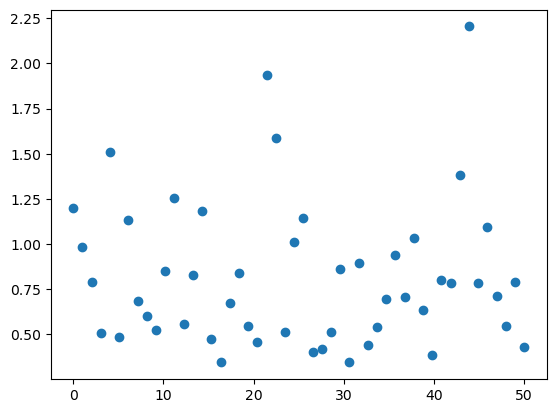

In [139]:
plt.scatter(np.linspace(0,50, 50), maksima)
plt.show()

c:\Users\Dell\anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:1838: RuntimeWarning: invalid value encountered in add
  logp = (np.log(a) + np.log(c) + sc.xlogy(a - 1.0, exm1c) +


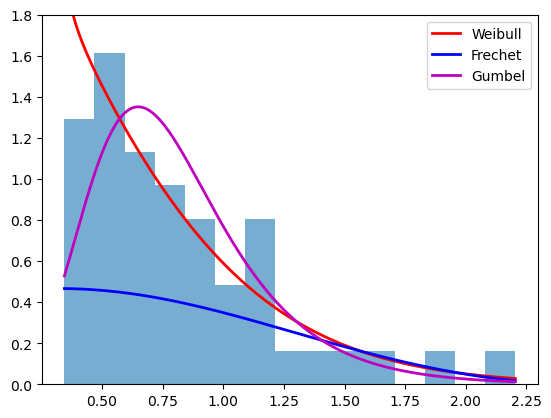

In [144]:
# Dopasowanie rozkładów
weibull_params = stats.exponweib.fit(maksima)
frechet_params = stats.genextreme.fit(maksima, floc=0)  # Frechet jest specjalnym przypadkiem rozkładu uogólnionego ekstremalnego
gumbel_params = stats.gumbel_r.fit(maksima)

# Generowanie danych na podstawie dopasowanych rozkładów
x = np.linspace(min(maksima), max(maksima), 1000)
weibull_pdf = stats.exponweib.pdf(x, *weibull_params)
frechet_pdf = stats.genextreme.pdf(x, *frechet_params)
gumbel_pdf = stats.gumbel_r.pdf(x, *gumbel_params)

# Rysowanie histogramu danych i dopasowanych rozkładów
plt.hist(maksima, bins=15, density = True, alpha=0.6)
plt.plot(x, weibull_pdf, 'r-', lw=2, label='Weibull')
plt.ylim(top = 1.8)
plt.plot(x, frechet_pdf, 'b-', lw=2, label='Frechet')
plt.plot(x, gumbel_pdf, 'm-', lw=2, label='Gumbel')
plt.legend()
plt.show()

In [141]:
# Dopasowanie rozkładów
weibull_params = stats.exponweib.fit(maksima)
frechet_params = stats.genextreme.fit(maksima, floc=0)  # Frechet jest specjalnym przypadkiem rozkładu uogólnionego ekstremalnego
gumbel_params = stats.gumbel_r.fit(maksima)

# Test K-S dla rozkładu Weibulla
ks_stat_weibull, p_value_weibull = stats.kstest(maksima, 'exponweib', args=weibull_params)

# Test K-S dla rozkładu Frecheta
ks_stat_frechet, p_value_frechet = stats.kstest(maksima, 'genextreme', args=frechet_params)

# Test K-S dla rozkładu Gumbela
ks_stat_gumbel, p_value_gumbel = stats.kstest(maksima, 'gumbel_r', args=gumbel_params)

print(f"Test K-S dla Weibulla: statystyka={ks_stat_weibull}, p-wartość={p_value_weibull}")
print(f"Test K-S dla Frecheta: statystyka={ks_stat_frechet}, p-wartość={p_value_frechet}")
print(f"Test K-S dla Gumbela: statystyka={ks_stat_gumbel}, p-wartość={p_value_gumbel}")


Test K-S dla Weibulla: statystyka=0.09119747663129074, p-wartość=0.7657710320978626
Test K-S dla Frecheta: statystyka=0.5256279140996503, p-wartość=2.127677085755045e-13
Test K-S dla Gumbela: statystyka=0.11027767452626608, p-wartość=0.5406972160923864


Czyli Weibull i Gumbel najelpszy